# The Bayesian Inverse Problem (BIP) vs Stochastic Inverse Problem (SIP)
---

This notebook explores the differences between the BIP and SIP and their respective solutions.

While we consider the example from Section 7 in [Combining Push-Forward Measures and Bayes' Rule to Construct Consistent Solutions to Stochastic Inverse Problems](https://epubs.siam.org/doi/abs/10.1137/16M1087229), we use the more recent notation/terminology first introduced in [Convergence of Probability Densities Using Approximate Models for Forward and Inverse Problems in Uncertainty Quantification](https://epubs.siam.org/doi/abs/10.1137/18M1181675).


## BIP and SIP setups, solutions, and interpretations.
---

For the BIP, we assume that observational data $q\in\mathcal{D}$ are given in the form of
$$
    q=Q(\lambda)+\eta
$$
where $\eta\sim N(0,\sigma^2)$ and for simplicity we assume the standard deviation $\sigma$ is known.
The use of an additive unbiased noise model following a Gaussian distribution with known variance is common in the formulation of a BIP.
If the noise model is not known exactly, then forms of it are often proposed and priors may be placed on the non-physical parameters such as $\sigma$ (called hyper-parameters), and these hyper-parameters become part of the parameter estimation problem.
This just introduces an additional layer of assumptions and computational complexity that we do not concern ourselves with here. 

The objective of the BIP is to determine the physical parameter $\lambda$ that can explain all of the observed data. 
To this end, a data-likelihood function is formed, which usually takes the form of a conditional density (or is proportional to if normalizing constants are ignored, which is often the case with the BIP)
$$
    L(q\, | \, \lambda) = \rho(q-Q(\lambda))
$$
for a single datum $q$ where $\rho$ is the density associated with the $N(0,\sigma^2)$ distribution.
If more data are observed, they are conceptually organized into a vector $q\in\mathbb{R}^m$ (where $m$ denotes the number of i.i.d. observed data points) and the data-likelihood function takes the form
$$
    L(q\, | \, \lambda) = \Pi_{i=1}^m \rho(q_i - Q(\lambda)).
$$
The objective of the BIP is evident in the form of such data-likelihoods. First of all, the statistical interpretation of a conditional density of the form (or proportional to) $L(q\, | \, \lambda)$ is to assess the relative likelihoods that different values of $\lambda$ could have produced the data vector $q$. Second of all, as more data are collected (through assumed repeated i.i.d. experiments where a true $\lambda$ value is assumed fixed across all such experiments), then $L(q\, | \, \lambda)$ will become more "peaked" around $Q(\lambda_{true})$ by design (we will see the impact of this concentration of probability in the example below).

To construct the posterior density on parameter space that "solves" the BIP and is used to assess the relative likelihoods of any particular parameter being the one true fixed parameter given the observed data, a prior description of uncertainty in any particular parameter being the "one true" parameter is required.
Let $\pi^{prior}_\Lambda(\lambda)$ denote this prior. 
Then, the posterior is a conditional density, denoted by $\pi^{post}_\Lambda(\lambda\, | \, q)$ that is proportional to the prior and data-likelihood functions.
That is to say, 
$$
    \pi^{post}_\Lambda(\lambda \, | \, q) \propto \pi^{prior}_\Lambda(\lambda) L(q\, | \, \lambda).
$$

Here is a good question: why on earth did Troy put "solves" in quotes? Because the posterior is just a means to an end. Most people actually treat parameter estimates related to the posterior to be the actual solutions to the BIP since that is what they are after. The posterior provides a way to describe the uncertainty in a point estimate.

At this point, you may find reading the introduction of [Data-consistent inversion for stochastic input-to-output maps](https://iopscience.iop.org/article/10.1088/1361-6420/ab8f83) a useful activity to help understand the differences in perspectives on the quantitative characterizations of uncertainty between the BIP and SIP. In particular, there is a good deal of discussion about the point of the BIP, the posterior, and typical point estimates (citations are also provided). 

Moving on to the SIP, the objective is to determine a distribution on the physical parameters $\lambda$ that can explain the variation in the observed data (i.e., the induced distribution on the data space defined by a push-forward is consistent with what is observed). 
The details of this are described in [Combining Push-Forward Measures and Bayes' Rule to Construct Consistent Solutions to Stochastic Inverse Problems](https://epubs.siam.org/doi/abs/10.1137/16M1087229) and later summarized in both [Convergence of Probability Densities Using Approximate Models for Forward and Inverse Problems in Uncertainty Quantification](https://epubs.siam.org/doi/abs/10.1137/18M1181675) and [Data-consistent inversion for stochastic input-to-output maps](https://iopscience.iop.org/article/10.1088/1361-6420/ab8f83). 

Using the notation/terminology of the later work, we first put an initial density, $\pi^{init}_\Lambda(\lambda)$ to describe some initial distribution on parameter space that *most assuredly is **not** a consistent distribution.* This is simply meant to be applied on the generalized contour structure induced by $Q^{-1}$ so that we have some means of defining how probabilities should be distributed in directions not informed by the observable quantities.
In the absence of any "good idea" about what this should be, we often apply a uniform distribution to represent all the possible variations of physical parameters being equally likely "as far as we know." 
After all, unless there is evidence/knowledge to the contrary, why should we impose anything other than this?

The push-forward of this initial density through the map $Q$ produces a *predicted* density, $\pi^{pred}_\mathcal{D}(q)$, which describes the relative likelihoods of various data we may observe before we have any actual data to suggest otherwise. This can be evaluated at any $q\in \mathcal{D}=Q(\Lambda)$, but as we will see, it is the evaluation of this density not at arbitrary data $q$ but at *predicted* data $Q(\lambda)$ associated with some proposed parameter $\lambda$ that makes all the difference.

Once an observed density is given/prescribed/estimated on $\mathcal{D}$, which we denote by $\pi^{obs}_\mathcal{D}(q)$, we can then formulate the ratio
$$
    r(\lambda) = \frac{\pi^{obs}(Q(\lambda))}{\pi^{pred}(Q(\lambda))},
$$
(which is sometimes denoted by $r(Q(\lambda))$ just to emphasize the dependence on the map $Q$), which serves as a multiplicative update to the initial density.
In other words, we *update* the initial density to create a new density
$$
    \pi^{update}_\Lambda(\lambda) = \pi^{init}_\Lambda(\lambda)r(\lambda).
$$

This form of the updated density follows form the Disintegration Theorem where the disintegration of the initial density is used to create the family of conditional densities on the contours defined by $Q^{-1}(q)$ for a.e. $q\in\mathcal{D}$. 
That this is an actual density requires a **predictability assumption**.
Moreover, the predictability assumption coupled with the Disintegration Theorem then guarantees that $\pi^{update}$ is not simply *an* update to the initial density but is *also* a consistent solution to the SIP meaning that its push-forward matches $\pi^{obs}_\mathcal{D}(q)$.

## A toy example to compare the BIP and SIP
---

$Q(\lambda)=\lambda^5$, $\Lambda=[-1,1]$, and the initial and prior densities are chosen to both be uniform on $\Lambda$. 

The data, $q$, follow a $N(\mu,\sigma^2)$ distribution.
The question is: do we formulate a BIP where we assume that there is a true parameter $\lambda^\star$ such that $\mu=Q(\lambda^\star)$ so that any individual datum $q=Q(\lambda^\star)+\eta$ where $\eta\sim N(0,\sigma^2)$ with known $\sigma$, or do we simply estimate $\pi^{obs}(q)$ from the data and solve the SIP?

In [1]:
# The libraries we will use for part 1 of talk
import numpy as np
from scipy.stats import norm, uniform # The standard Normal distribution
from scipy.stats import gaussian_kde as kde # A standard kernel density estimator

import matplotlib.pyplot as plt

In [2]:
def QoI(lam,p): # defing a QoI mapping function as monomials to some power p
    q = lam**p
    return q

In [3]:
N, mu, sigma = int(1E4), 0.25, 0.1 # number of samples from initial and observed mean (mu) and st. dev (sigma)
lam = np.random.uniform(low=-1,high=1,size=N) # sample set of the initial

# Evaluate the QoI map on this initial sample set to form a predicted data set
qvals_predict = QoI(lam,5) # Evaluate lam^5 samples

# Estimate the push-forward density for the QoI
pi_predict = kde( qvals_predict )

### First: Something somewhat silly/unrealistic but it sets the stage.
---

Suppose we just "know" that $\mu=0.25$ and we use this to formulate the SIP and BIP  where we just assume we observed the mean as the datum for the BIP.

This will never happen, but it is illustrative of the differences between the BIP and SIP. 

In [4]:
# Compute approximate r using approx pf and compute its mean
r_approx = np.divide(norm.pdf(qvals_predict, loc=mu, scale=sigma), pi_predict(qvals_predict))

In [5]:
# Use r to compute weighted KDE approximating the updated density
update_kde = kde( lam, weights=r_approx )

# Construct estimated push-forward of this updated density
pf_update_kde = kde( qvals_predict, weights=r_approx)

In [6]:
# estimate normalizing constant for posterior with MC estimate based on samples from prior
C = np.mean(norm.pdf(qvals_predict, loc=mu, scale=sigma))
data_like_normalized = norm.pdf(qvals_predict, loc=mu, scale=sigma)/C

# Estimate of posterior
posterior_kde = kde( lam, weights=data_like_normalized )

# Construct estimated push-forward of posterior
pf_posterior_kde = kde( qvals_predict, weights=data_like_normalized )

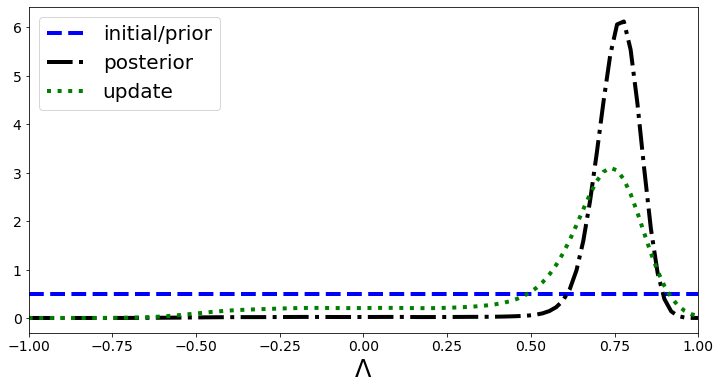

In [7]:
fig = plt.figure(figsize=(12,6)) # Plot the initial and posterior
lam_plot = np.linspace(-1,1, num=100)
plt.plot(lam_plot,uniform.pdf(lam_plot, loc=-1, scale=2), 'b--', linewidth=4, label="initial/prior")
plt.plot(lam_plot, update_kde(lam_plot),'k-.', linewidth=4, label="posterior")
plt.plot(lam_plot, posterior_kde(lam_plot), 'g:', linewidth=4, label='update')
plt.xlim([-1,1]), plt.xticks(fontsize=14), plt.yticks(fontsize=14), plt.xlabel("$\Lambda$",fontsize=24), plt.legend(fontsize=20);
plt.savefig('bip-vs-sip-1.png'), plt.show();

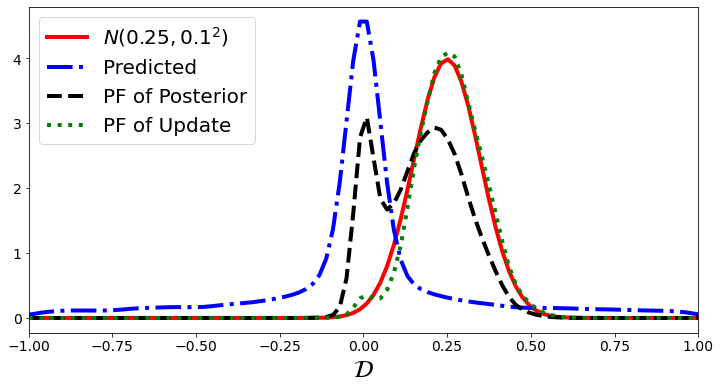

In [8]:
plt.figure(figsize=(12,6)) # Plot the push-forward of the initial, observed density, and push-forward of pullback and stats posterior
qplot = np.linspace(-1,1, num=100)
plt.plot(qplot,norm.pdf(qplot, loc=mu, scale=sigma), 'r-', linewidth=4, label="$N(0.25,0.1^2)$")
plt.plot(qplot,pi_predict(qplot),'b-.', linewidth=4, label="Predicted")
plt.plot(qplot,pf_posterior_kde(qplot),'k--', linewidth=4, label="PF of Posterior")
plt.plot(qplot,pf_update_kde(qplot),'g:', linewidth=4, label="PF of Update")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([-1,1]), plt.xlabel("$\mathcal{D}$", fontsize=24), plt.legend(fontsize=20);
plt.savefig('bip-vs-sip-pf-1.png'), plt.show();

## Okay, now let's simulate data and do something more realistic
---

Now we simulate data. You can change the `num_data` to see what would happen as data are increased. Notice that the BIP solution and push-forward are very stable with low sample size.

Also, notice that even if we estimate a "true parameter" with the BIP, e.g., using the mean of the updated density, then this is also generally closer to what the parameter value is that corresponds to $\mu\in\mathcal{D}$ than the MAP point (the maximum posterior point). 

In [127]:
# Compute more observations for use in BIP
np.random.seed(123456) # Just for reproducibility, you can comment out if you want.
num_data = 20
data = norm.rvs(loc=mu, scale=sigma**2, size=num_data)

In [128]:
# We will estimate the observed distribution using a parametric estimate to keep
# the assumptions involved as similar as possible between the BIP and the SIP
# So, we will assume the sigma is known but that the mean mu is unknown and estimated
# from data to fit a Gaussian distribution
mu_est = np.mean(data) 

r_approx = np.divide(norm.pdf(qvals_predict, loc=mu_est, scale=sigma), pi_predict(qvals_predict))

In [129]:
# Use r to compute weighted KDE approximating the updated density
update_kde = kde( lam, weights=r_approx )

# Construct estimated push-forward of this updated density
pf_update_kde = kde( qvals_predict, weights=r_approx)

In [130]:
def data_likelihood(qvals, data, num_data):
    v = 1
    for i in range(num_data):
        v *= norm.pdf(qvals-data[i], loc=0, scale=sigma)
    return v

In [131]:
likelihood_vals = np.zeros(N)
for i in range(N):
    likelihood_vals[i] = data_likelihood(qvals_predict[i], data, num_data)

In [132]:
# compute normalizing constants
C_nonlinear = np.mean(likelihood_vals)
data_like_normalized = likelihood_vals/C_nonlinear

posterior_kde = kde( lam, weights=data_like_normalized )

# Construct push-forward of statistical Bayesian posterior
pf_posterior_kde = kde( qvals_predict, weights=data_like_normalized )

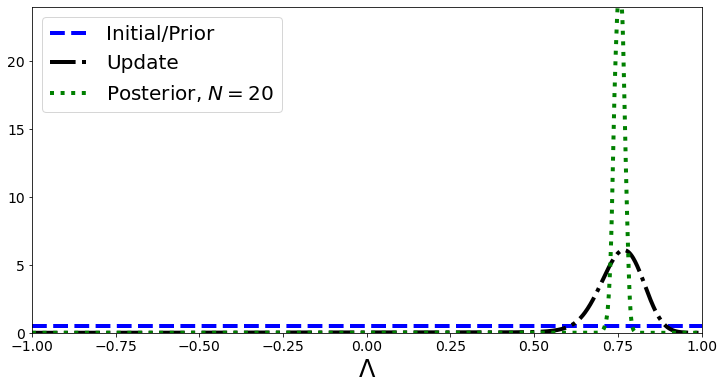

In [133]:
fig = plt.figure(figsize=(12,6)) # Plot the initial and posterior
lam_plot = np.linspace(-1,1, num=1000)
plt.plot(lam_plot,uniform.pdf(lam_plot, loc=-1, scale=2), 'b--', linewidth=4, label="Initial/Prior")
plt.plot(lam_plot, update_kde(lam_plot),'k-.', linewidth=4, label="Update")
post_plot = plt.plot(lam_plot, posterior_kde(lam_plot), 'g:', linewidth=4, label=f'Posterior, $N={num_data}$')
plt.ylim([0,24]), plt.xlim([-1,1]), plt.xticks(fontsize=14), plt.yticks(fontsize=14), plt.xlabel("$\Lambda$",fontsize=24), plt.legend(fontsize=20);
plt.savefig(f'bip-vs-sip-{num_data}.png'), plt.show();

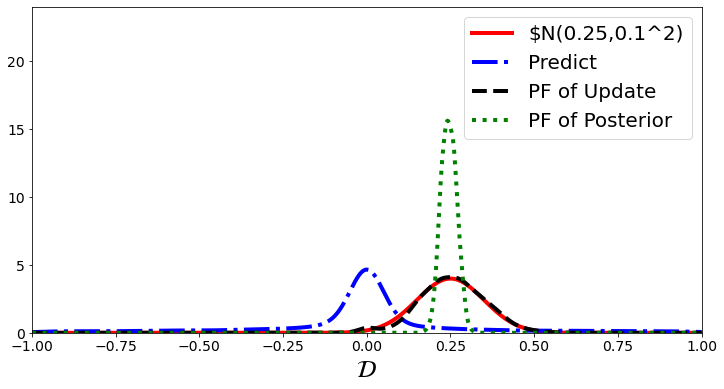

In [134]:
plt.figure(figsize=(12,6)) # Plot the push-forward of the initial, observed density, and push-forward of pullback and stats posterior
qplot = np.linspace(-1,1, num=1000)
plt.plot(qplot,norm.pdf(qplot, loc=mu, scale=sigma), 'r-', linewidth=4, label=f"$N(0.25,0.1^2)")
plt.plot(qplot,pi_predict(qplot),'b-.', linewidth=4, label="Predict")
plt.plot(qplot,pf_update_kde(qplot),'k--', linewidth=4, label="PF of Update")
plt.plot(qplot,pf_posterior_kde(qplot),'g:', linewidth=4, label="PF of Posterior")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([0,24]), plt.xlim([-1,1]), plt.xlabel("$\mathcal{D}$", fontsize=24), plt.legend(fontsize=20);
plt.savefig(f'bip-vs-sip-pf-{num_data}.png'), plt.show();